# Creating my Ideal Spotify Dance Playlist:
## A Spotify Side Project

Objective: The goal of this project is to take SPotify's 'Top Artist' playlist from 2016 to 2020 and visualize patterns in their audio features
and create a playlist based on danceability

##### 1. GET THE NEEDED DATA USING SPOTIPY  

In [1]:
# importing neeed packages
import pandas as pd
import numpy as np
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import os

In [2]:
# setting environment variables needed to gain acces to spotify api 
os.environ["SPOTIPY_CLIENT_ID"] = "##########################"
os.environ["SPOTIPY_CLIENT_SECRET"] = "##############################"

In [6]:
# Storing the URIs for the needed playlist
top16_uri = 'spotify:playlist:37i9dQZF1DX9VMKbxrbvpz' # 2016
top17_uri = 'spotify:playlist:37i9dQZF1DX9dp45EzSeyl' # 2017
top18_uri = 'spotify:playlist:37i9dQZF1DXc2E26J6t4vv' # 2018
top19_uri = 'spotify:playlist:37i9dQZF1DWUQuMV5yVzhv' # 2019
top20_uri = 'spotify:playlist:37i9dQZF1DXcBWIGoYBM5M' # 2020

In [5]:
# create spotify object 
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

In [40]:
# test on 2016
top16 = spotify.playlist(top16_uri)

In [104]:
top17 = spotify.playlist(top17_uri)
top18 = spotify.playlist(top18_uri)
top19 = spotify.playlist(top19_uri)
top20 = spotify.playlist(top20_uri)

In [101]:
# WE'LL NEED TO WRITE A FUNCTION THAT GETS THE REAQUIRED DATA FROM THE PLAYLIST WE PULLED
def getData(playlist):
    numTracks = len(playlist['tracks']['items']) # get number of tracks in playlist
    # empty list to store needed data
    track_name = [] 
    track_uri = []
    track_pop = []
    
    # loop through the length of the playlist extract and append data to list created above
    for i in  range(numTracks):
        tracks = playlist['tracks']['items'][i]['track']
        track_name.append(tracks['name'])
        track_uri.append(tracks['uri'])
        track_pop.append(tracks['popularity'])
    # combine list into one data frame 
    frame =  pd.DataFrame(np.column_stack([track_name, track_uri, track_pop]),
                         columns= ['Title','URI', 'Popularity'])
    return frame

In [102]:
 # TEST THE FUNCTION ON THE 2016 PLAYLIST:
top16_frame = getData(top16)
top16_frame.head()
# IT WORKS

,Title,URI,Popularity
0,Love Yourself,spotify:track:3hB5DgAiMAQ4DzYbsMq1IT,22
1,One Dance,spotify:track:1xznGGDReH1oQq0xzbwXa3,18
2,Work,spotify:track:14WWzenpaEgQZlqPq2nk4v,14
3,7 Years,spotify:track:7129iqBafaphfc3WPCGC0L,50
4,"Boom (feat. MOTi, Ty Dolla $ign, Wizkid & Kran...",spotify:track:6dLLEE96JRnX1ngkL77yiA,32


In [105]:
# NOW RUN THE FUNCTION ON THE REST OF PLAYLIST
top17_frame = getData(top17)
top18_frame = getData(top18)
top19_frame = getData(top19)
top20_frame = getData(top20)

###### 1.2  Get audio features  for each song

In [116]:
# NOW WE NEED TO CREATE A FUNCTION TO GET THE AUDIO FEATURES FOR EACH SONG 
def getAudio(data):
    uri = list(data['URI'])
    features = spotify.audio_features(uri)
    Data = pd.DataFrame(features)
    Data = Data.iloc[ : , :11]
    return Data

In [117]:
# GET THE AUDIO DATA 
audio16 = getAudio(top16_frame)
audio17 = getAudio(top17_frame)
audio18 = getAudio(top18_frame)
audio19 = getAudio(top19_frame)
audio20 = getAudio(top20_frame)

In [118]:
# STACK ON THE SONG AND AUDIO DATA 
songs = pd.concat([top16_frame, top17_frame, top18_frame, top19_frame, top20_frame], axis=0)
songFeatures = pd.concat([audio16, audio17, audio18, audio19, audio20], axis = 0)

In [125]:
# CONCATENATE(ROWWISE) THE SONG AND SONGFEATURES TO ARRIVE AT A MASTER DATASET 
topSongs = pd.concat([songs, songFeatures], axis =1 )

# write  song titles and URIs to csv 
topSongs[['Title', 'URI']].to_csv("C:/Users/aseal/Desktop/Spotify Project/Tracks&URIs.csv")
# we wont need titles and URIs for analyis so exlcude those columns
topSongs = topSongs.iloc[ :, 2: ]

# create a colum denoting the year the song was releaased
# will use this for exploratory analysis
topSongs['Year'] = 0
topSongs['Year'][:50] = 2016
topSongs['Year'][50:100] = 2017
topSongs['Year'][100:150] = 2018
topSongs['Year'][150:200] = 2019
topSongs['Year'][200:] = 2020

# write our final dataset to csv
topSongs.to_csv("C:/Users/aseal/Desktop/Spotify Project/TrackData.csv")
topSongs.head()

C:\Users\aseal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\aseal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aseal\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\aseal\Anaconda3\lib\site-packages\ipykernel_launc

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year
0,22,0.609,0.378,4,-9.828,1,0.4380,0.83500,0.00000,0.2800,0.515,100.418,2016
1,18,0.791,0.619,1,-5.886,1,0.0532,0.00784,0.00423,0.3510,0.371,103.989,2016
2,14,0.725,0.534,11,-6.238,1,0.0946,0.07520,0.00000,0.0919,0.558,91.974,2016
3,50,0.742,0.479,10,-5.830,1,0.0551,0.29000,0.00000,0.3910,0.346,119.951,2016
4,32,0.704,0.784,7,-4.463,0,0.1420,0.00283,0.00000,0.4190,0.656,100.083,2016


## ANALYSIS

#### Lets breakdown our data by year and look at the audio feature distributions

In [2]:
# load needed libraries
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read in song data created in the last section 
songData = pd.read_csv("C:/Users/aseal/Desktop/Spotify Project/TrackData.csv")


In [3]:
# A quick glimpse of the data 
songData.head()

,Unnamed: 0,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year
0,0,22,0.609,0.378,4,-9.828,1,0.4380,0.83500,0.00000,0.2800,0.515,100.418,2016
1,1,18,0.791,0.619,1,-5.886,1,0.0532,0.00784,0.00423,0.3510,0.371,103.989,2016
2,2,14,0.725,0.534,11,-6.238,1,0.0946,0.07520,0.00000,0.0919,0.558,91.974,2016
3,3,50,0.742,0.479,10,-5.830,1,0.0551,0.29000,0.00000,0.3910,0.346,119.951,2016
4,4,32,0.704,0.784,7,-4.463,0,0.1420,0.00283,0.00000,0.4190,0.656,100.083,2016


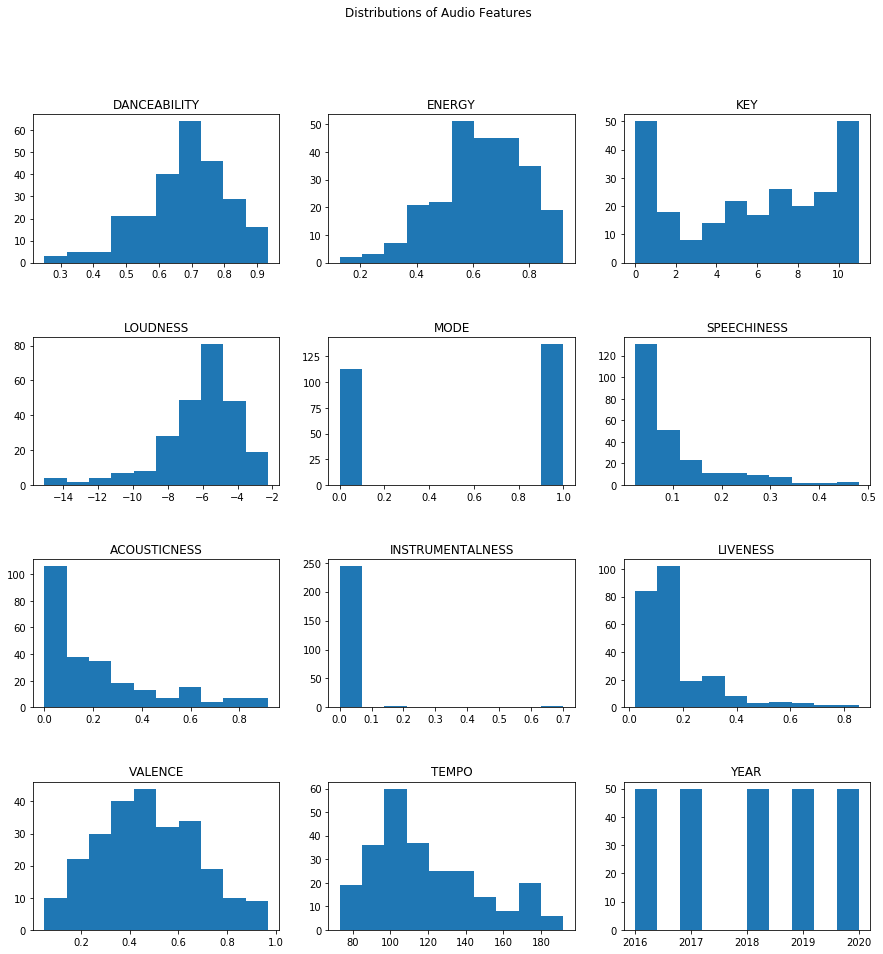

In [17]:
# Plot of histograms of the all the audio features 
fig, axes = plt.subplots(nrows=4, ncols=3, figsize = (15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Audio Features')

# colums to use 
featues = list(songData.columns)[2:]

for feature, ax in zip(featues, axes.flatten()):
    ax.hist(songData[feature])
    ax.set(title = feature.upper())


In [19]:
# save this figure
fig.savefig('C:/Users/aseal/Desktop/Spotify Project/distributions.png')

In [13]:
# GROUP THE DATA BY YEAR AND TAKE SOME AVERAGES
byYear = songData.groupby('Year')
byYear_means= byYear.agg(np.mean)
byYear_means = byYear_means.reset_index()

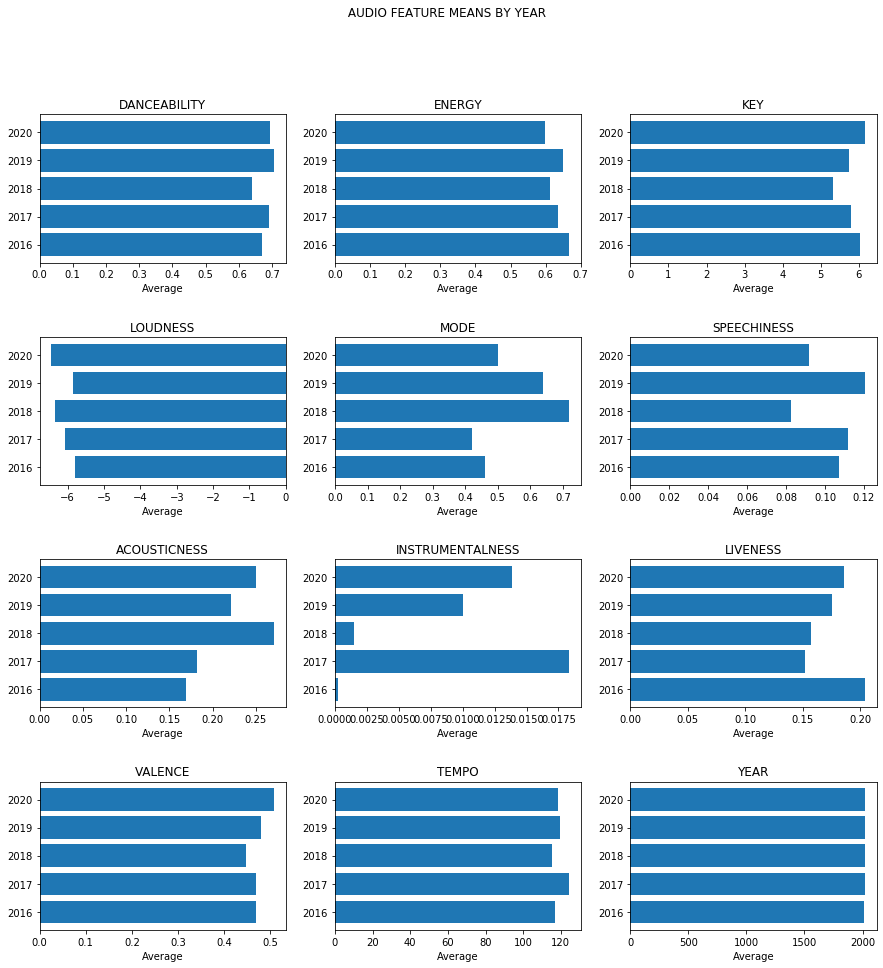

In [27]:
# Creat bar charts of the aggreagated data by year
fig, axes = plt.subplots(nrows=4, ncols=3, figsize = (15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle(' AUDIO FEATURE MEANS BY YEAR')

# columns to use 
features = list(byYear_means.columns)[3:]
years = ['2016', '2017', '2018', '2019', '2020']

for feature, ax in zip(featues, axes.flatten()):
    values = list(byYear_means[feature])
    ax.barh(years, values)
    ax.set_yticklabels(years)
    ax.set_xlabel('Average Score')
    ax.set(title = feature.upper())


In [31]:
fig.savefig('C:/Users/aseal/Desktop/Spotify Project/averages.png')

### Lets Explore Danceability of some of these Songs

In [4]:
# load needed libraries
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# read in song data created in the last section 
songData = pd.read_csv("C:/Users/aseal/Desktop/Spotify Project/TrackData.csv")

In [72]:
# We will be working with a dataset of 250 songs from 
# the last 5 years
songData.shape

(250, 15)

In [73]:
songData.head()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year,Title,URI
0,22,0.609,0.378,4,-9.828,1,0.4380,0.83500,0.00000,0.2800,0.515,100.418,2016,Love Yourself,spotify:track:3hB5DgAiMAQ4DzYbsMq1IT
1,18,0.791,0.619,1,-5.886,1,0.0532,0.00784,0.00423,0.3510,0.371,103.989,2016,One Dance,spotify:track:1xznGGDReH1oQq0xzbwXa3
2,14,0.725,0.534,11,-6.238,1,0.0946,0.07520,0.00000,0.0919,0.558,91.974,2016,Work,spotify:track:14WWzenpaEgQZlqPq2nk4v
3,50,0.742,0.479,10,-5.830,1,0.0551,0.29000,0.00000,0.3910,0.346,119.951,2016,7 Years,spotify:track:7129iqBafaphfc3WPCGC0L
4,32,0.704,0.784,7,-4.463,0,0.1420,0.00283,0.00000,0.4190,0.656,100.083,2016,"Boom (feat. MOTi, Ty Dolla $ign, Wizkid & Kran...",spotify:track:6dLLEE96JRnX1ngkL77yiA


In [5]:
# sort dataset by popular from most to leasr popular
dance_sorted = songData.sort_values(by= ['danceability'], ascending=False)
# The top 15 most danceable songs from the most popular artist over the last five years
dance = list(dance_sorted['danceability'])
title = list(dance_sorted['Title'])
print('Top 15 MOST DANCEABLE SONG FROM THE LAST 5 YEARS')
for i in range(0,15):
    print(i + 1, title[i],'||' ,'Danceability' ,dance[i] ) 

Top 15 MOST DANCEABLE SONG FROM THE LAST 5 YEARS
1 Another One Bites The Dust - Remastered 2011 || Danceability 0.9329999999999999
2 WHATS POPPIN || Danceability 0.919
3 HUMBLE. || Danceability 0.9079999999999999
4 Old Town Road || Danceability 0.907
5 bury a friend || Danceability 0.905
6 MotorSport || Danceability 0.9009999999999999
7 The Box || Danceability 0.8959999999999999
8 Formation || Danceability 0.8959999999999999
9 Feels (feat. Pharrell Williams, Katy Perry & Big Sean) || Danceability 0.893
10 Press || Danceability 0.888
11 SWISH || Danceability 0.884
12 Woah || Danceability 0.882
13 Sunday Best || Danceability 0.878
14 Blanco || Danceability 0.87
15 Tulips || Danceability 0.866


#### Lets see if any of the other features are correlated with danceability

 Because some of the features  are on different scales we will need to standardize the data before generating correlation coefficients 

In [100]:
scaler = StandardScaler()
names = list(songData.columns[1:12])
features_scaled =  scaler.fit_transform(songData.iloc[:, 1:12])
features_scaled = pd.DataFrame(data= features_scaled, columns= names )

In [102]:
dance_cor = features_scaled.corrwith(features_scaled['danceability'])

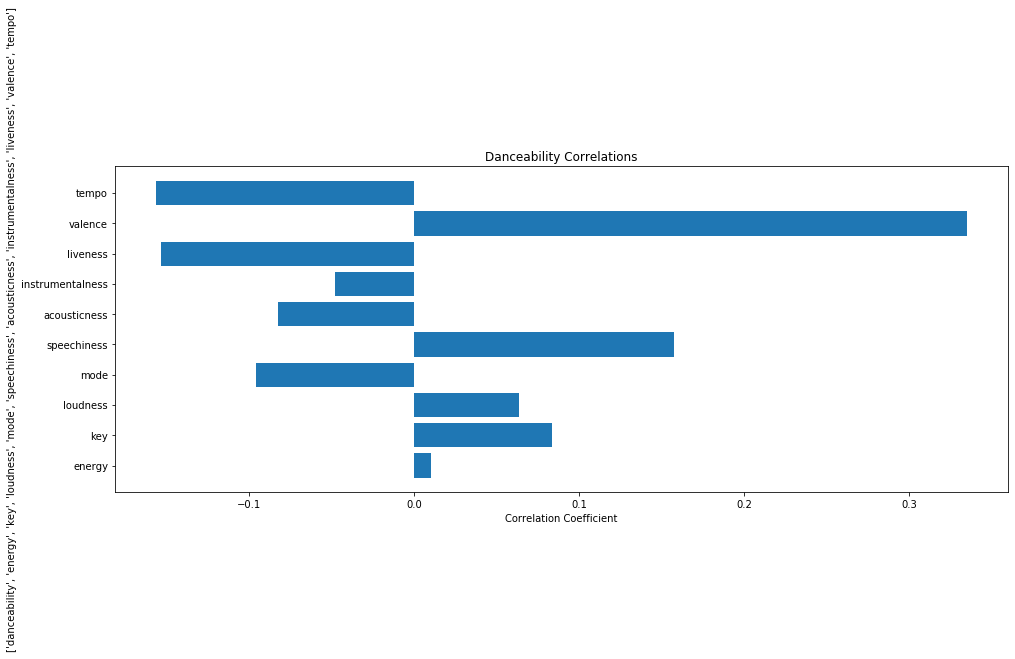

In [120]:
plt.figure(figsize=(16, 6))
plt.barh(names[1:], dance_cor[1:])
plt.ylabel(names)
plt.xlabel('Correlation Coefficient')
plt.title('Danceability Correlations')
plt.show()

In [115]:
# pairwaise correlations
full_corr = features_scaled.corr()

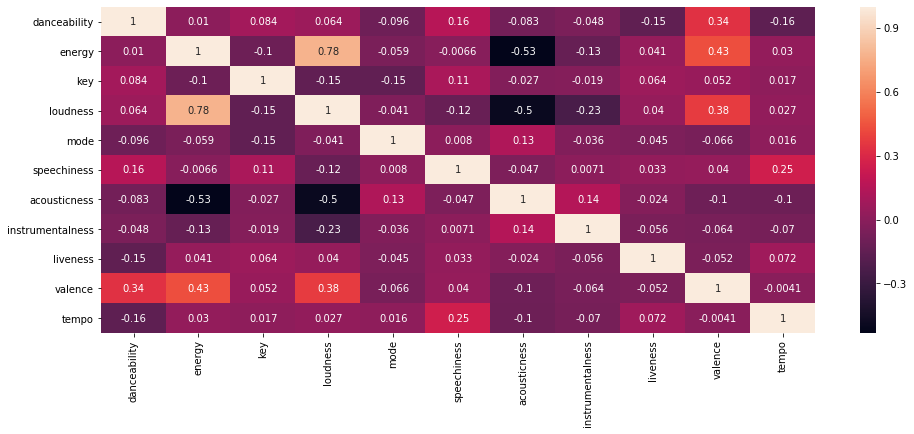

In [118]:
# visualize using seaborn
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.heatmap(full_corr, annot=True)

## Create a playlist of the top 50 dance songs

In [3]:

username = '#############'
scope = 'playlist-modify-public'
#redirect_uri = 'http://localhost/'
token = util.prompt_for_user_token(username, scope, redirect_uri='http://localhost:8888/callback/' )



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=c2b9bc01f18f43a7b1ec3504bdcce4ee&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Fcallback%2F&scope=playlist-modify-public in your browser


Enter the URL you were redirected to: http://localhost:8888/callback/?code=AQDv5rKfn-ntk3sq7eOS2QrghSPuTwcxNZBOiqMg58cRESx_rNd7bNKIZsW7RvugL3Gx5AbHAG68rf0JJDoFUgXrUwMQZVVPOQs1GVK_T9VaIkf0jxWh66_wDABLgruz25JXlxVgBEzNx8M0vAQDLPPjlRUVq8VHJGmPDY7Wy1sYAleoLHHVshntF_1mB_-jwSE0FjQQHTawiOAdu7IMHIIbhFEG9Aqgf0HuVP4




In [10]:
# now create playlist of danceable pop songs of the last 5 years 
top50dance = list(dance_sorted['URI'])[:50]
sp = spotipy.Spotify(auth=token)
sp.user_playlist_create('######', 'So You Think You Can Dance?')


{'collaborative': False,
 'description': '',
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/5socpgcSOQBlpsH27NS6ul'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/5socpgcSOQBlpsH27NS6ul',
 'id': '5socpgcSOQBlpsH27NS6ul',
 'images': [],
 'name': 'So You Think You Can Dance?',
 'owner': {'display_name': 'aseals1996',
  'external_urls': {'spotify': 'https://open.spotify.com/user/aseals1996'},
  'href': 'https://api.spotify.com/v1/users/aseals1996',
  'id': 'aseals1996',
  'type': 'user',
  'uri': 'spotify:user:aseals1996'},
 'primary_color': None,
 'public': True,
 'snapshot_id': 'MSxmZDJhYTUzYjQxZmYwNmFjN2E3YjM5MWZjZTlmMzJkN2NmZDcyMjQ4',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/5socpgcSOQBlpsH27NS6ul/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0},
 'type': 'playlist',
 'uri': 'spotify:playlist:5socpgcSOQBlpsH27NS6ul'}

In [11]:
sp.user_playlist_add_tracks(user = '#####', playlist_id='5socpgcSOQBlpsH27NS6ul', tracks= top50dance)

{'snapshot_id': 'MyxkODIyZGM5N2ZkN2YzNjQxNmNiZTM0YmRkZjQ0NjkzMjkyYmI0ZTQ4'}